# Analytical Dataset Exploration

## Date Created: 1/20/21
## Date Modified: 1/27/21 (Millie)

### Authors: Geri, Millie

This notebook serves as a place to do data exploration on the `initial_analytic_dataset.csv` which holds all the variables of interest from each of our respective datasets. This is a place to look at the relationships between variables and other assumption checks.

In [1]:
#Packages import
#import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import base64

#Note: You only need to import what you will be using in the notebook. 

### Dataset Introduction

This `initial_analytic_dataset.csv` holds all the columns of interest from the first round of data cleaning. The data includes high level information starting with population data for all county areas, then broadband connection percent, households median income, unemployment rates, and ends with information about devices in each household. These variables were chosen because factors, such as income ane unemployment, may have a relationship or impact whether or not households have access to technology or internet. 

Later in the notebook, other columns will be created with addtional datasets, such as region and division, to visualize factors in subsections of the country. 

In [2]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [3]:
for col in analytic_data.columns:
    print(col)

id
pop_total
county
state
pop_class
year
broadband_pct
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
geo_id_x
est_total_households_x
est_med_income_households
est_total_families
est_med_income_families
geo_id_y
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
geo_id_x.1
est_total_households_y
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub
geo_id_y.1
total_one_device
total_multi_device
total_without_device
total_households_or

Note from Millie: @JJ - Can you provide documentation onw hat the different "est_total_households_with_no" are? I am assuming that it mean no for a specific device, perhaps the one above, but I would like that confirmed.

In [4]:
# Reformating broadband_pct
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0       78.899997
1       78.099996
2       60.399997
3       66.100001
4       68.500000
          ...    
3217          NaN
3218          NaN
3219          NaN
3220          NaN
3221    79.100001
Name: broadband_pct, Length: 3222, dtype: float64

### EDA Exploration

#### Broadband Percent v. Percent Total Population Enrolled

Text(0.5, 0, 'Broadband Percentage')

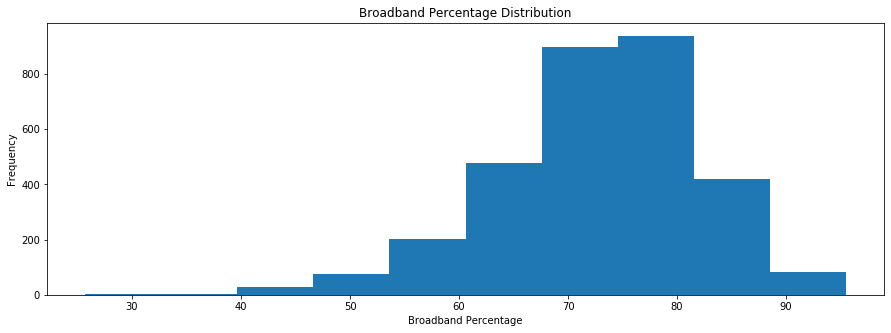

In [5]:
analytic_data["broadband_pct"].plot.hist(figsize=(15, 5))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

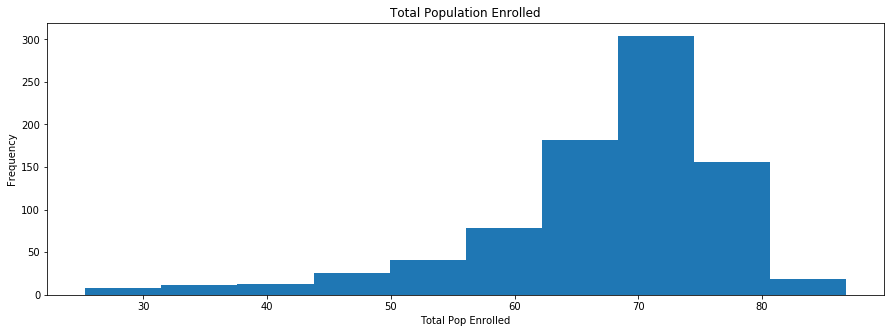

In [6]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(15, 5))
plt.title("Total Population Enrolled")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

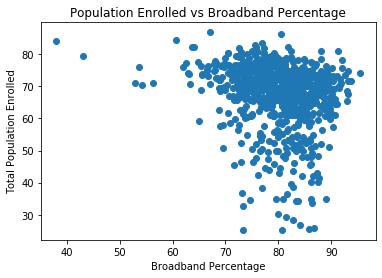

In [7]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

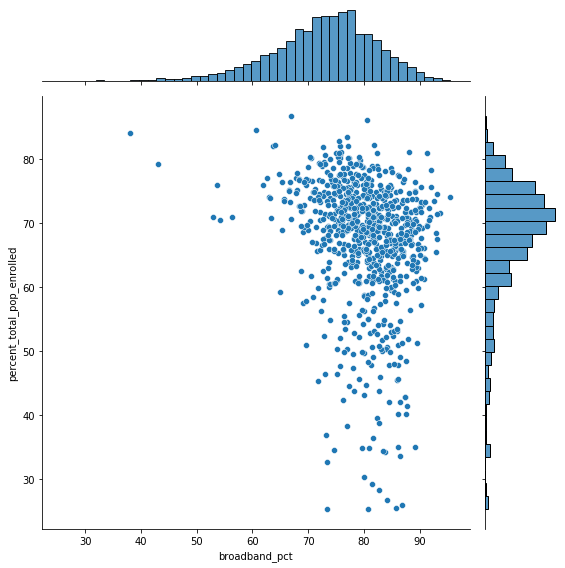

In [8]:
#Note from Millie: I added this plot because I thought it might be more useful than looking at three different plots
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "percent_total_pop_enrolled", height = 8); 

#### Distrubution of Devices in Households

For now, looking at all households with some sort of device against total households.

#selecting certian variables
devices_in_hh = analytic_data[['id','est_total_households_frm_devices',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

#choosing columns to pivot
to_pivot = devices_in_hh[[
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable']]

#reshaping data
plot_devices_df = pd.melt(devices_in_hh, id_vars = 'id', value_vars = to_pivot, var_name = "type", value_name = "value")

#creating a separate value column to place decimal in different place
plot_devices_df['value2'] = plot_devices_df['value']*.001

plot_devices_df.describe()

#Going to add my device distibution code later tonight

There is a huge std and data is heavily skewed to the right. 

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_devices_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value2", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value2", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

#### Employment Data Distribution

In [ ]:
employment_info = analytic_data[['id', 'est_total_pop_16_over', 'est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over']]

plot_employ_df = pd.melt(employment_info, id_vars = 'id', value_vars = ['est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over'], var_name = "type", value_name = "value")

plot_employ_df['value2'] = plot_devices_df['value']*.001

plot_employ_df.describe()


In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_employ_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

Density plot above is incomplete. Currently troubleshooting. 

References for facet density plot:
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

#### Unemployment and Broadband Percent

In [ ]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "hex", height = 8); 

In [ ]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "reg", height = 8); 

### Adding Region Dimension to the Analytic Data

This is to make it easier to breakdown the data visuals so we are not looking at the entire country on one level. All visuals below are exploring with region column. 

In [ ]:
regions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
regions.columns = regions.columns.str.lower().str.replace(" ", "_")
regions

In [ ]:
revised_analytic_data = analytic_data.merge(regions, on = "state")

In [ ]:
sns.jointplot(data = revised_analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
             hue = "region", height = 8); 

In [ ]:
#broadband percent
bb_region = revised_analytic_data[['id', 'region', 'broadband_pct']]
sns.displot(
    bb_region, x="broadband_pct", col="region",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
#umemployment ratio
sns.displot(
    revised_analytic_data, x="est_unemp_pop_ratio_16_over", col="region",
    height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
#creating a separate value column to place decimal in different place
revised_analytic_data['x_est_med_income_households'] = revised_analytic_data['est_med_income_households']*.001

#median income
sns.displot(
    revised_analytic_data, x="x_est_med_income_households", col="region",
    height=3, facet_kws=dict(margin_titles=True),
)


## Analyzing Population Classification
Many Rural and Micro Areas do not have Census data for most of our data. Therefore, for smaller, more rural areas, we can only look at broadband data. We may consider breaking down the Metro Areas into different bins.

In [ ]:
#creating a separate value column to place decimal in different place
revised_analytic_data['broadband_pct'] = revised_analytic_data['broadband_pct']

#median income
sns.displot(
    revised_analytic_data, x="broadband_pct", col="pop_class",
    height=3, facet_kws=dict(margin_titles=True),
)


### Creating Scores

#### Income

There are various definition of poverty level or income thresholds depending on the size of the household and location. This doucmentation on poverty level for 2018 give thresholds for up to 8 persons in a household: https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2018-poverty-guidelines

There is additional documentation households data here:https://www.census.gov/quickfacts/fact/note/US/HSD410219

With this new information, instead of choosing an arbitruary number of persons in a household and blindly applying it to all, we will need to add infomration from the households and families dataset. 

Note: Millie is creating a new notebook to view and test the data cleaning and then merging it into the initial clean dataset. 

For simplicity, we are working with the median income for households only (we can include famileis later if we are interested in that feature). 

In [ ]:
#Observing income information 
income_info = analytic_data[['id','est_total_households_official', 'est_avg_household_size',
                             'est_med_income_households',
                             'est_total_families_official','est_avg_families_size',
                             'est_med_income_families']]

income_info["rnd_avg_household_size"] = income_info.loc[:,('est_avg_household_size')].round(0)
income_info["rnd_avg_families_size"] = income_info.loc[:, ('est_avg_families_size')].round(0)
#trying to get rid of the "setting with copy" warning


In [ ]:
income_info["mod_est_med_income_households"] = income_info["est_med_income_households"]*.001

plt.figure(figsize=(15, 5))
sns.histplot(data=income_info,
             x="mod_est_med_income_households",
             kde=True)
plt.xlabel("Thousands of U.S. Dollars")
plt.title("Majority of families in U.S. counties have incomes around $60K"); 

In [ ]:
income_info["rnd_avg_household_size"].unique()

In [ ]:
income_info["rnd_avg_families_size"].unique()

In [ ]:
# def poverty_lvl(state, income, household_size):
#     """Assign labels to county income and household size
#     """
#     if state != "Alaska" or state != "Hawaii":
#         if household_size == 1 and income <= 12140 or
#         household_size == 2 and income <= 16460 or
#         household_size == 3 and income <= 20780 or
#         household_size == 4 and income <= 29420:
#             label = "Poverty"
#     if state == "Alaska":
#         if household_size == 1 and income <= 15180 or
#         household_size == 2 and income <= 20580 or
#         household_size == 3 and income <= 25980 or
#         household_size == 4 and income <= 31380:
#             label = "Poverty"
#     if state == "Hawaii":
#         if household_size == 1 and income <= 13960 or
#         household_size == 2 and income <= 18930 or
#         household_size == 3 and income <= 23900 or
#         household_size == 4 and income <= 28870:
#             label = "Poverty"
#     else:
#         label = "Above Poverty Line"
        
#     return label


In [ ]:
#Creating text label for income 
def income_label(est_med_income_households):
    """Assign labels to med county income and household size
    """
    if est_med_income_households < 31380: # highest poverty line is household of 4 in Alaska
        label = "Below Poverty Line"
    elif est_med_income_households >= 31380 and est_med_income_households < 50000: 
        label = "Just Above Poverty"
    elif est_med_income_households >= 50000 and est_med_income_households < 70000: 
        label = "Middle Income"
    elif est_med_income_households >= 70000 and est_med_income_households < 90000: 
        label = "Upper Middle Income"
    elif est_med_income_households >= 90000 and est_med_income_households != 'nan': 
        label = "Upper Income"
    else: #Greater than or equal to 90k
        label = "Unknown"
    return label

#Creating the dict for numeric score of income 
income_score_dict = dict({'Below Poverty Line': 1, 
                         'Just Above Poverty': 2,
                         'Middle Income': 3, 
                         'Upper Middle Income': 4, 
                         'Upper Income': 5})

#applying the labels
analytic_data["income_label"] = analytic_data["est_med_income_households"].apply(income_label)

#applying the score
analytic_data["income_score"] = analytic_data["income_label"].map(income_score_dict)

analytic_data

Device Score

In [11]:
device_pct_by_pop = analytic_data.iloc[:,[0,1,2,20,21,22,23,24,25,26,27,28,29,30]].copy()
device_pct_by_pop = device_pct_by_pop.dropna()
device_pct_by_pop["survery_pct"] = device_pct_by_pop["est_total_households_y"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_device_pct"] = device_pct_by_pop["est_total_households_with_device"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_desktop_pct"] = device_pct_by_pop["est_total_households_with_desktop"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_smartphone_pct"] = device_pct_by_pop["est_total_households_with_smartphone"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_portable_pct"] = device_pct_by_pop["est_total_households_with_portable"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop["total_no_device_pct"] = device_pct_by_pop["est_total_households_none"]/device_pct_by_pop["pop_total"]*100
device_pct_by_pop


,id,pop_total,county,est_total_households_y,est_total_households_with_device,est_total_households_with_desktop,est_total_households_with_no,est_total_households_with_smartphone,est_total_households_with_no2,est_total_households_with_portable,est_total_households_with_no3,est_total_households_with_other,est_total_households_with_no4,est_total_households_none,survery_pct,total_device_pct,total_desktop_pct,total_smartphone_pct,total_portable_pct,total_no_device_pct
1,0500000US01003,231767.0,Baldwin County,176222.0,10105.0,10426.0,11901.0,11597.0,25990.0,30117.0,16569.0,15074.0,27152.0,17291.0,76.034120,4.359982,4.498483,5.003732,12.994516,7.460510
7,0500000US01015,116441.0,Calhoun County,93284.0,6661.0,7451.0,8612.0,7661.0,12608.0,13616.0,8305.0,7855.0,12240.0,8275.0,80.112675,5.720494,6.398949,6.579298,11.693476,7.106603
21,0500000US01043,87866.0,Cullman County,66680.0,3861.0,4500.0,5424.0,4850.0,10131.0,10843.0,5407.0,6123.0,9116.0,6425.0,75.888284,4.394191,5.121435,5.519769,12.340382,7.312271
24,0500000US01049,71608.0,DeKalb County,57239.0,4894.0,4176.0,4084.0,4561.0,8261.0,9548.0,4533.0,4921.0,7377.0,4884.0,79.933806,6.834432,5.831751,6.369400,13.333706,6.820467
25,0500000US01051,87977.0,Elmore County,65407.0,3767.0,4847.0,6563.0,5577.0,10087.0,11642.0,5364.0,5261.0,7550.0,4749.0,74.345568,4.281801,5.509395,6.339157,13.233004,5.398002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,0500000US72061,89780.0,Guaynabo Municipio,72581.0,3563.0,5816.0,5713.0,4817.0,10307.0,11232.0,5820.0,6481.0,9840.0,8992.0,80.843172,3.968590,6.478057,5.365337,12.510581,10.015594
3192,0500000US72097,73077.0,Mayagüez Municipio,61443.0,4727.0,7922.0,4215.0,3741.0,6820.0,7541.0,4142.0,4832.0,8811.0,8692.0,84.079806,6.468520,10.840620,5.119258,10.319252,11.894303
3200,0500000US72113,137491.0,Ponce Municipio,110975.0,7111.0,9533.0,9191.0,7453.0,14910.0,15744.0,8025.0,9622.0,16151.0,13235.0,80.714374,5.171975,6.933545,5.420718,11.450931,9.626085
3207,0500000US72127,342259.0,San Juan Municipio,271287.0,14593.0,21909.0,21366.0,18180.0,37676.0,41007.0,21116.0,22057.0,36817.0,36566.0,79.263657,4.263730,6.401293,5.311767,11.981277,10.683722


In [12]:
def desktop_pct_rank(total_desktop_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_desktop_pct < 1.579: ##Less than 2 standard deviations below
        label = "1"
    elif total_desktop_pct < 4.233: ##Less than 1 standard deviations below
        label = "2"
    elif total_desktop_pct < 9.511: ##Less than 1 standard deviations above
        label = "3"
    elif total_desktop_pct < 12.155: ##Less than 2 standard deviations above
        label = "4"
    elif total_desktop_pct > 14.799: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["desktop_rank"] = device_pct_by_pop["total_desktop_pct"].apply(desktop_pct_rank)
device_pct_by_pop

,id,pop_total,county,est_total_households_y,est_total_households_with_device,est_total_households_with_desktop,est_total_households_with_no,est_total_households_with_smartphone,est_total_households_with_no2,est_total_households_with_portable,...,est_total_households_with_other,est_total_households_with_no4,est_total_households_none,survery_pct,total_device_pct,total_desktop_pct,total_smartphone_pct,total_portable_pct,total_no_device_pct,desktop_rank
1,0500000US01003,231767.0,Baldwin County,176222.0,10105.0,10426.0,11901.0,11597.0,25990.0,30117.0,...,15074.0,27152.0,17291.0,76.034120,4.359982,4.498483,5.003732,12.994516,7.460510,3
7,0500000US01015,116441.0,Calhoun County,93284.0,6661.0,7451.0,8612.0,7661.0,12608.0,13616.0,...,7855.0,12240.0,8275.0,80.112675,5.720494,6.398949,6.579298,11.693476,7.106603,3
21,0500000US01043,87866.0,Cullman County,66680.0,3861.0,4500.0,5424.0,4850.0,10131.0,10843.0,...,6123.0,9116.0,6425.0,75.888284,4.394191,5.121435,5.519769,12.340382,7.312271,3
24,0500000US01049,71608.0,DeKalb County,57239.0,4894.0,4176.0,4084.0,4561.0,8261.0,9548.0,...,4921.0,7377.0,4884.0,79.933806,6.834432,5.831751,6.369400,13.333706,6.820467,3
25,0500000US01051,87977.0,Elmore County,65407.0,3767.0,4847.0,6563.0,5577.0,10087.0,11642.0,...,5261.0,7550.0,4749.0,74.345568,4.281801,5.509395,6.339157,13.233004,5.398002,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,0500000US72061,89780.0,Guaynabo Municipio,72581.0,3563.0,5816.0,5713.0,4817.0,10307.0,11232.0,...,6481.0,9840.0,8992.0,80.843172,3.968590,6.478057,5.365337,12.510581,10.015594,3
3192,0500000US72097,73077.0,Mayagüez Municipio,61443.0,4727.0,7922.0,4215.0,3741.0,6820.0,7541.0,...,4832.0,8811.0,8692.0,84.079806,6.468520,10.840620,5.119258,10.319252,11.894303,4
3200,0500000US72113,137491.0,Ponce Municipio,110975.0,7111.0,9533.0,9191.0,7453.0,14910.0,15744.0,...,9622.0,16151.0,13235.0,80.714374,5.171975,6.933545,5.420718,11.450931,9.626085,3
3207,0500000US72127,342259.0,San Juan Municipio,271287.0,14593.0,21909.0,21366.0,18180.0,37676.0,41007.0,...,22057.0,36817.0,36566.0,79.263657,4.263730,6.401293,5.311767,11.981277,10.683722,3


In [13]:
def smartphone_pct_rank(total_smartphone_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_smartphone_pct < 4.275: ##Less than 2 standard deviations below
        label = "1"
    elif total_smartphone_pct < 5.207: ##Less than 1 standard deviations below
        label = "2"
    elif total_smartphone_pct < 7.271: ##Less than 1 standard deviations above
        label = "3"
    elif total_smartphone_pct < 8.303: ##Less than 2 standard deviations above
        label = "4"
    elif total_smartphone_pct > 9.335: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["smartphone_rank"] = device_pct_by_pop["total_smartphone_pct"].apply(smartphone_pct_rank)
device_pct_by_pop

,id,pop_total,county,est_total_households_y,est_total_households_with_device,est_total_households_with_desktop,est_total_households_with_no,est_total_households_with_smartphone,est_total_households_with_no2,est_total_households_with_portable,...,est_total_households_with_no4,est_total_households_none,survery_pct,total_device_pct,total_desktop_pct,total_smartphone_pct,total_portable_pct,total_no_device_pct,desktop_rank,smartphone_rank
1,0500000US01003,231767.0,Baldwin County,176222.0,10105.0,10426.0,11901.0,11597.0,25990.0,30117.0,...,27152.0,17291.0,76.034120,4.359982,4.498483,5.003732,12.994516,7.460510,3,2
7,0500000US01015,116441.0,Calhoun County,93284.0,6661.0,7451.0,8612.0,7661.0,12608.0,13616.0,...,12240.0,8275.0,80.112675,5.720494,6.398949,6.579298,11.693476,7.106603,3,3
21,0500000US01043,87866.0,Cullman County,66680.0,3861.0,4500.0,5424.0,4850.0,10131.0,10843.0,...,9116.0,6425.0,75.888284,4.394191,5.121435,5.519769,12.340382,7.312271,3,3
24,0500000US01049,71608.0,DeKalb County,57239.0,4894.0,4176.0,4084.0,4561.0,8261.0,9548.0,...,7377.0,4884.0,79.933806,6.834432,5.831751,6.369400,13.333706,6.820467,3,3
25,0500000US01051,87977.0,Elmore County,65407.0,3767.0,4847.0,6563.0,5577.0,10087.0,11642.0,...,7550.0,4749.0,74.345568,4.281801,5.509395,6.339157,13.233004,5.398002,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,0500000US72061,89780.0,Guaynabo Municipio,72581.0,3563.0,5816.0,5713.0,4817.0,10307.0,11232.0,...,9840.0,8992.0,80.843172,3.968590,6.478057,5.365337,12.510581,10.015594,3,3
3192,0500000US72097,73077.0,Mayagüez Municipio,61443.0,4727.0,7922.0,4215.0,3741.0,6820.0,7541.0,...,8811.0,8692.0,84.079806,6.468520,10.840620,5.119258,10.319252,11.894303,4,2
3200,0500000US72113,137491.0,Ponce Municipio,110975.0,7111.0,9533.0,9191.0,7453.0,14910.0,15744.0,...,16151.0,13235.0,80.714374,5.171975,6.933545,5.420718,11.450931,9.626085,3,3
3207,0500000US72127,342259.0,San Juan Municipio,271287.0,14593.0,21909.0,21366.0,18180.0,37676.0,41007.0,...,36817.0,36566.0,79.263657,4.263730,6.401293,5.311767,11.981277,10.683722,3,3


In [14]:
def portable_pct_rank(total_portable_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_portable_pct < 9.709: ##Less than 2 standard deviations below
        label = "1"
    elif total_portable_pct < 11.057: ##Less than 1 standard deviations below
        label = "2"
    elif total_portable_pct < 13.753: ##Less than 1 standard deviations above
        label = "3"
    elif total_portable_pct < 15.101: ##Less than 2 standard deviations above
        label = "4"
    elif total_portable_pct > 16.449: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["portable_rank"] = device_pct_by_pop["total_portable_pct"].apply(portable_pct_rank)
device_pct_by_pop

,id,pop_total,county,est_total_households_y,est_total_households_with_device,est_total_households_with_desktop,est_total_households_with_no,est_total_households_with_smartphone,est_total_households_with_no2,est_total_households_with_portable,...,est_total_households_none,survery_pct,total_device_pct,total_desktop_pct,total_smartphone_pct,total_portable_pct,total_no_device_pct,desktop_rank,smartphone_rank,portable_rank
1,0500000US01003,231767.0,Baldwin County,176222.0,10105.0,10426.0,11901.0,11597.0,25990.0,30117.0,...,17291.0,76.034120,4.359982,4.498483,5.003732,12.994516,7.460510,3,2,3
7,0500000US01015,116441.0,Calhoun County,93284.0,6661.0,7451.0,8612.0,7661.0,12608.0,13616.0,...,8275.0,80.112675,5.720494,6.398949,6.579298,11.693476,7.106603,3,3,3
21,0500000US01043,87866.0,Cullman County,66680.0,3861.0,4500.0,5424.0,4850.0,10131.0,10843.0,...,6425.0,75.888284,4.394191,5.121435,5.519769,12.340382,7.312271,3,3,3
24,0500000US01049,71608.0,DeKalb County,57239.0,4894.0,4176.0,4084.0,4561.0,8261.0,9548.0,...,4884.0,79.933806,6.834432,5.831751,6.369400,13.333706,6.820467,3,3,3
25,0500000US01051,87977.0,Elmore County,65407.0,3767.0,4847.0,6563.0,5577.0,10087.0,11642.0,...,4749.0,74.345568,4.281801,5.509395,6.339157,13.233004,5.398002,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,0500000US72061,89780.0,Guaynabo Municipio,72581.0,3563.0,5816.0,5713.0,4817.0,10307.0,11232.0,...,8992.0,80.843172,3.968590,6.478057,5.365337,12.510581,10.015594,3,3,3
3192,0500000US72097,73077.0,Mayagüez Municipio,61443.0,4727.0,7922.0,4215.0,3741.0,6820.0,7541.0,...,8692.0,84.079806,6.468520,10.840620,5.119258,10.319252,11.894303,4,2,2
3200,0500000US72113,137491.0,Ponce Municipio,110975.0,7111.0,9533.0,9191.0,7453.0,14910.0,15744.0,...,13235.0,80.714374,5.171975,6.933545,5.420718,11.450931,9.626085,3,3,3
3207,0500000US72127,342259.0,San Juan Municipio,271287.0,14593.0,21909.0,21366.0,18180.0,37676.0,41007.0,...,36566.0,79.263657,4.263730,6.401293,5.311767,11.981277,10.683722,3,3,3


In [15]:
def no_device_pct_rank(total_no_device_pct):
    """Assign labels to county according to their broadband pct
    """
    if total_no_device_pct < 2.689: ##Less than 2 standard deviations below
        label = "1"
    elif total_no_device_pct < 4.763: ##Less than 1 standard deviations below
        label = "2"
    elif total_no_device_pct < 8.911: ##Less than 1 standard deviations above
        label = "3"
    elif total_no_device_pct < 10.985: ##Less than 2 standard deviations above
        label = "4"
    elif total_no_device_pct > 13.059: ##Greater than 2 standard deviations above
        label = "5"    
    else: 
        label = "0"
    return label
device_pct_by_pop["no_device_rank"] = device_pct_by_pop["total_no_device_pct"].apply(no_device_pct_rank)
device_pct_by_pop

,id,pop_total,county,est_total_households_y,est_total_households_with_device,est_total_households_with_desktop,est_total_households_with_no,est_total_households_with_smartphone,est_total_households_with_no2,est_total_households_with_portable,...,survery_pct,total_device_pct,total_desktop_pct,total_smartphone_pct,total_portable_pct,total_no_device_pct,desktop_rank,smartphone_rank,portable_rank,no_device_rank
1,0500000US01003,231767.0,Baldwin County,176222.0,10105.0,10426.0,11901.0,11597.0,25990.0,30117.0,...,76.034120,4.359982,4.498483,5.003732,12.994516,7.460510,3,2,3,3
7,0500000US01015,116441.0,Calhoun County,93284.0,6661.0,7451.0,8612.0,7661.0,12608.0,13616.0,...,80.112675,5.720494,6.398949,6.579298,11.693476,7.106603,3,3,3,3
21,0500000US01043,87866.0,Cullman County,66680.0,3861.0,4500.0,5424.0,4850.0,10131.0,10843.0,...,75.888284,4.394191,5.121435,5.519769,12.340382,7.312271,3,3,3,3
24,0500000US01049,71608.0,DeKalb County,57239.0,4894.0,4176.0,4084.0,4561.0,8261.0,9548.0,...,79.933806,6.834432,5.831751,6.369400,13.333706,6.820467,3,3,3,3
25,0500000US01051,87977.0,Elmore County,65407.0,3767.0,4847.0,6563.0,5577.0,10087.0,11642.0,...,74.345568,4.281801,5.509395,6.339157,13.233004,5.398002,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,0500000US72061,89780.0,Guaynabo Municipio,72581.0,3563.0,5816.0,5713.0,4817.0,10307.0,11232.0,...,80.843172,3.968590,6.478057,5.365337,12.510581,10.015594,3,3,3,4
3192,0500000US72097,73077.0,Mayagüez Municipio,61443.0,4727.0,7922.0,4215.0,3741.0,6820.0,7541.0,...,84.079806,6.468520,10.840620,5.119258,10.319252,11.894303,4,2,2,0
3200,0500000US72113,137491.0,Ponce Municipio,110975.0,7111.0,9533.0,9191.0,7453.0,14910.0,15744.0,...,80.714374,5.171975,6.933545,5.420718,11.450931,9.626085,3,3,3,4
3207,0500000US72127,342259.0,San Juan Municipio,271287.0,14593.0,21909.0,21366.0,18180.0,37676.0,41007.0,...,79.263657,4.263730,6.401293,5.311767,11.981277,10.683722,3,3,3,4


##Adding Distribution of Ranks

#### Broadband Classification

Broadband Percentage Score was assigned by the data percentiles found in the dataset. Scores were assigned with 1 being the lowest percentile and 

In [ ]:
revised_analytic_data["broadband_pct"].describe()

In [ ]:
#creating broadband classification
def bdbd_type(broadband_pct):
    """Assign labels to county according to their broadband pct
    """
    if broadband_pct < 25.7:
        label = "1"
    elif broadband_pct < 67.4: #Between 25.8 to 67.4
        label = "2"
    elif broadband_pct < 73.6: #Between 67.5 to 73.6
        label = "3"
    elif broadband_pct < 78.8: #Between 73.7 to 78.8
        label = "4"
    elif broadband_pct > 78.8: #Greater than 78.8
        label = "5"    
    else: #Greater than 50k
        label = "1"
    return label

In [ ]:
revised_analytic_data["bdbd_score"] = revised_analytic_data["broadband_pct"].apply(bdbd_type)

In [ ]:
bdbd_df = revised_analytic_data[["county", "state","pop_total", "pop_class", "broadband_pct", "bdbd_score"]]
bdbd_df

In [ ]:
bdbd_df = revised_analytic_data[["county", "state","pop_total", "pop_class", "broadband_pct", "bdbd_score"]]
bdbd_df

In [ ]:
corrz = bdbd_df.corr()
corrz

In [ ]:
my_contingency_table = pd.crosstab(index=bdbd_df["pop_class"], columns=bdbd_df["bdbd_score"])
my_contingency_table

In [ ]:
sns.heatmap(my_contingency_table)

In [ ]:
sns.heatmap(my_contingency_table, cmap="Reds")

In [ ]:
norm_con = pd.crosstab(index=bdbd_df["pop_class"], columns=bdbd_df["bdbd_score"], normalize="columns")*100
sns.heatmap(norm_con)